# Setting

## 한글 글꼴 설치 (설치 후 런타임 다시 시작)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,889 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## 구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 라이브러리 불러오기

In [ ]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic') 

from collections import Counter

# Load Data

## Data Frame으로 불러오기

In [39]:
df_info_path = '/content/drive/MyDrive/머신러닝 엔지니어링/데이콘/제주도 도로 교통량 예측/data/data_info.csv'
df_train_path = '/content/drive/MyDrive/머신러닝 엔지니어링/데이콘/제주도 도로 교통량 예측/data/train.csv'
df_test_path = '/content/drive/MyDrive/머신러닝 엔지니어링/데이콘/제주도 도로 교통량 예측/data/test.csv'

In [40]:
df_info = pd.read_csv(df_info_path, index_col=0)
df_train = pd.read_csv(df_train_path, index_col=0)
df_test = pd.read_csv(df_test_path, index_col=0)

## 기본 사항 확인

In [41]:
df_info

,변수 설명
변수명,
id,아이디
base_date,날짜
day_of_week,요일
base_hour,시간대
road_in_use,도로사용여부
lane_count,차로수
road_rating,도로등급
multi_linked,중용구간 여부
connect_code,연결로 코드


In [42]:
df_train.shape

(4701217, 22)

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4701217 entries, TRAIN_0000000 to TRAIN_4701216
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   base_date              int64  
 1   day_of_week            object 
 2   base_hour              int64  
 3   lane_count             int64  
 4   road_rating            int64  
 5   road_name              object 
 6   multi_linked           int64  
 7   connect_code           int64  
 8   maximum_speed_limit    float64
 9   vehicle_restricted     float64
 10  weight_restricted      float64
 11  height_restricted      float64
 12  road_type              int64  
 13  start_node_name        object 
 14  start_latitude         float64
 15  start_longitude        float64
 16  start_turn_restricted  object 
 17  end_node_name          object 
 18  end_latitude           float64
 19  end_longitude          float64
 20  end_turn_restricted    object 
 21  target                 float64
dtypes: fl

In [44]:
df_train.isnull().sum()

base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [45]:
df_train.head()

,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
id,,,,,,,,,,,,,,,,,,,,,
TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,0.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,0.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,0.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,0.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,0.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [46]:
df_test.shape

(291241, 21)

## 결측치 확인

In [47]:
df_test.isnull().sum()

base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
dtype: int64

In [48]:
df_test.head()

,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
id,,,,,,,,,,,,,,,,,,,,,
TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,0.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,0.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,0.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,0.0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,0.0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음


## 중복값 확인

In [49]:
for col in list(df_train):

  remainders = df_train.drop_duplicates([col]).shape[0]

  if remainders != df_train.shape[0]:

    print(f'중복된 값이 있는 Column : {col}')

중복된 값이 있는 Column : base_date
중복된 값이 있는 Column : day_of_week
중복된 값이 있는 Column : base_hour
중복된 값이 있는 Column : lane_count
중복된 값이 있는 Column : road_rating
중복된 값이 있는 Column : road_name
중복된 값이 있는 Column : multi_linked
중복된 값이 있는 Column : connect_code
중복된 값이 있는 Column : maximum_speed_limit
중복된 값이 있는 Column : vehicle_restricted
중복된 값이 있는 Column : weight_restricted
중복된 값이 있는 Column : height_restricted
중복된 값이 있는 Column : road_type
중복된 값이 있는 Column : start_node_name
중복된 값이 있는 Column : start_latitude
중복된 값이 있는 Column : start_longitude
중복된 값이 있는 Column : start_turn_restricted
중복된 값이 있는 Column : end_node_name
중복된 값이 있는 Column : end_latitude
중복된 값이 있는 Column : end_longitude
중복된 값이 있는 Column : end_turn_restricted
중복된 값이 있는 Column : target


## 상관계수 확인

In [50]:
df_train.corr()

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
base_date,1.000000,-0.008645,0.011463,0.018547,0.000832,-0.010633,-0.018713,NaN,-0.011030,NaN,-0.004599,-0.016818,-0.004954,-0.016786,-0.004972,-0.033997
base_hour,-0.008645,1.000000,-0.029194,0.031658,0.005711,-0.002649,-0.036756,NaN,-0.003231,NaN,-0.007880,-0.021599,-0.011478,-0.021597,-0.011489,-0.159407
lane_count,0.011463,-0.029194,1.000000,-0.095717,-0.026555,-0.029290,0.384002,NaN,-0.177224,NaN,-0.050715,0.182674,-0.094806,0.182330,-0.094732,-0.144256
road_rating,0.018547,0.031658,-0.095717,1.000000,0.024218,-0.054160,-0.327474,NaN,-0.118630,NaN,-0.125618,-0.204793,0.007401,-0.204843,0.007386,-0.261693
multi_linked,0.000832,0.005711,-0.026555,0.024218,1.000000,-0.001111,-0.020245,NaN,-0.008790,NaN,0.042977,-0.014906,0.026895,-0.014907,0.026896,-0.008408
connect_code,-0.010633,-0.002649,-0.029290,-0.054160,-0.001111,1.000000,-0.015190,NaN,-0.020491,NaN,-0.025846,0.036623,-0.045695,0.037163,-0.044853,0.048348
maximum_speed_limit,-0.018713,-0.036756,0.384002,-0.327474,-0.020245,-0.015190,1.000000,NaN,0.085080,NaN,0.059511,0.253147,-0.033018,0.252958,-0.032907,0.425715
vehicle_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight_restricted,-0.011030,-0.003231,-0.177224,-0.118630,-0.008790,-0.020491,0.085080,NaN,1.000000,NaN,0.792803,-0.128291,0.034926,-0.128305,0.034915,0.294092
height_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


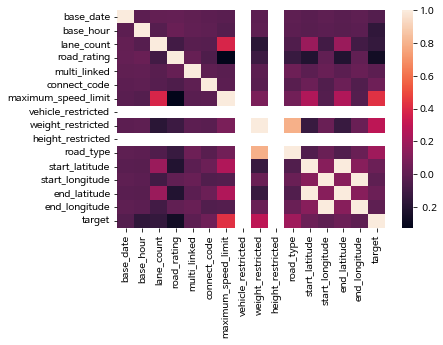

In [51]:
sns.heatmap(df_train.corr())

# Visualization

## 재귀 함수

통계치 출력

In [52]:
def print_mode(df, col):

  cnt = Counter(df[col])
  list_cnt = cnt.most_common(3)

  for idx, value in enumerate(list_cnt):

    print(f'{col}의 최빈값 {idx+1}순위 : {value[0]} & {value[-1]}개')

In [53]:
def print_statistics(df, col):

  max = df['target'].max()
  min = df['target'].min()
  mean = df['target'].mean()
  median = df['target'].median()

  print(f'{col}의 최대값 : {max}')
  print(f'{col}의 최소값 : {min}')
  print(f'{col}의 평균값 : {mean}')
  print(f'{col}의 중앙값 : {median}')
  print_mode(df, col)

히스토그램

In [54]:
def identify_hist(df, col):

  sns.histplot(data=df[col], kde=True)
  print_statistics(df, col)

count chart

In [55]:
def identify_count(df, col, target='target'):

  print(df[col].value_counts())

  sns.countplot(data=df, x=col)
  plt.show()

항목 별 히스토그램

In [56]:
def value_hist(df, col, target='target'):

  for value in df[col].unique():

    cond = (df[col]==value)
    cond_df = df.loc[cond]

    print(f'{value} 데이터 갯수 : {cond_df.shape[0]}')

    print_statistics(cond_df, target)

    fig, ax = plt.subplots(ncols=2, figsize=(13, 6))

    sns.histplot(data=cond_df, x='target', ax=ax[0])
    ax[0].set_title(f'{col}의 {value} 히스토그램')
    ax[0].set_xticks(range(0,int(df[target].max()+1)), 20)

    sns.boxplot(data=cond_df, x='target', ax=ax[1])
    ax[1].set_title(f'{col}의 {value} Box Plot')
    
    plt.show()

## tartet 히스토그램 & Box Plot

target의 최대값 : 113.0
target의 최소값 : 1.0
target의 평균값 : 42.78844180134633
target의 중앙값 : 43.0
target의 최빈값 1순위 : 48.0 & 112044개
target의 최빈값 2순위 : 49.0 & 110244개
target의 최빈값 3순위 : 50.0 & 108822개


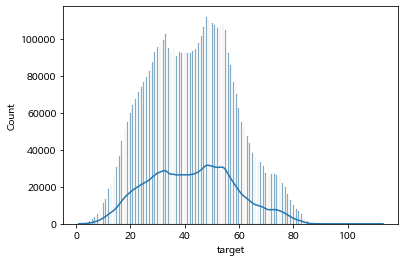

In [57]:
identify_hist(df_train, 'target')

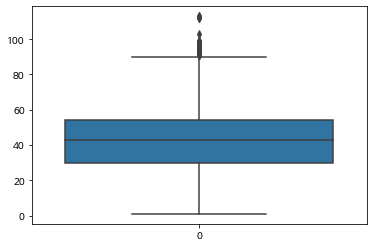

In [58]:
sns.boxplot(data=df_train['target'])

## 요일 분포

금    684024
수    675583
목    674070
일    673632
토    669767
화    662498
월    661643
Name: day_of_week, dtype: int64


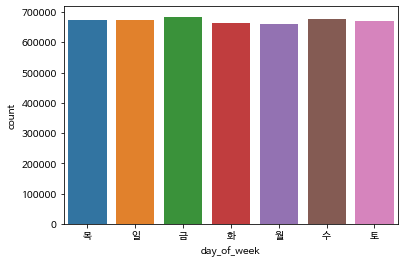

In [59]:
identify_count(df_train, 'day_of_week')

목 데이터 갯수 : 674070
target의 최대값 : 95.0
target의 최소값 : 1.0
target의 평균값 : 42.76834453395048
target의 중앙값 : 43.0
target의 최빈값 1순위 : 48.0 & 16247개
target의 최빈값 2순위 : 49.0 & 15861개
target의 최빈값 3순위 : 50.0 & 15737개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


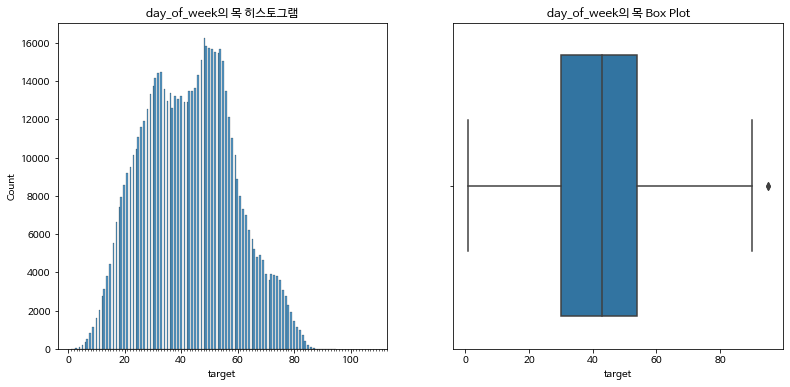

일 데이터 갯수 : 673632
target의 최대값 : 103.0
target의 최소값 : 1.0
target의 평균값 : 43.17929967697496
target의 중앙값 : 43.0
target의 최빈값 1순위 : 48.0 & 16700개
target의 최빈값 2순위 : 49.0 & 16071개
target의 최빈값 3순위 : 47.0 & 15885개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


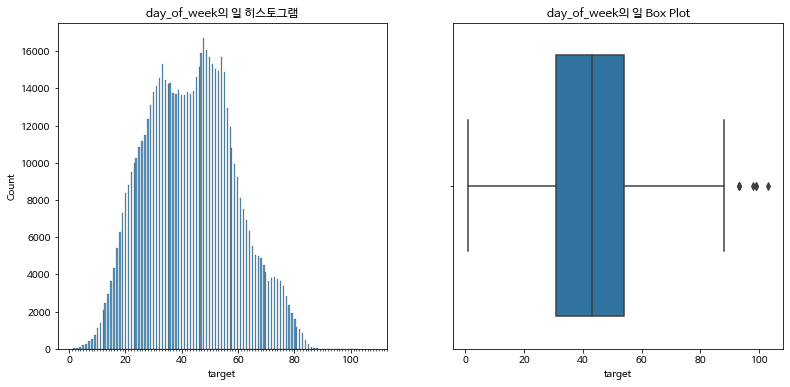

금 데이터 갯수 : 684024
target의 최대값 : 112.0
target의 최소값 : 1.0
target의 평균값 : 42.450327766277205
target의 중앙값 : 42.0
target의 최빈값 1순위 : 49.0 & 15937개
target의 최빈값 2순위 : 48.0 & 15819개
target의 최빈값 3순위 : 54.0 & 15703개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


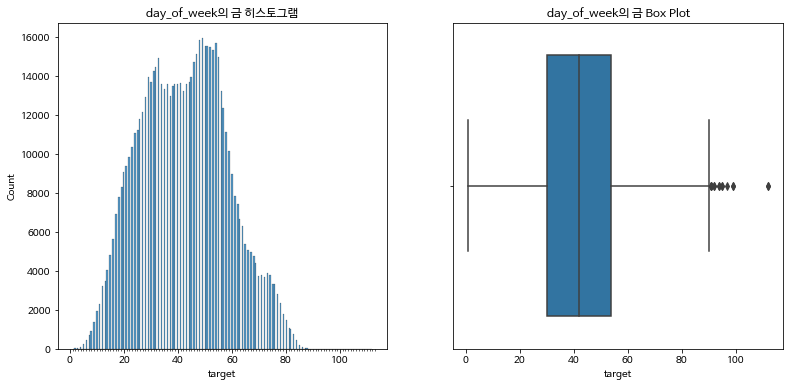

화 데이터 갯수 : 662498
target의 최대값 : 113.0
target의 최소값 : 1.0
target의 평균값 : 42.699197582483265
target의 중앙값 : 43.0
target의 최빈값 1순위 : 48.0 & 15599개
target의 최빈값 2순위 : 52.0 & 15574개
target의 최빈값 3순위 : 49.0 & 15337개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


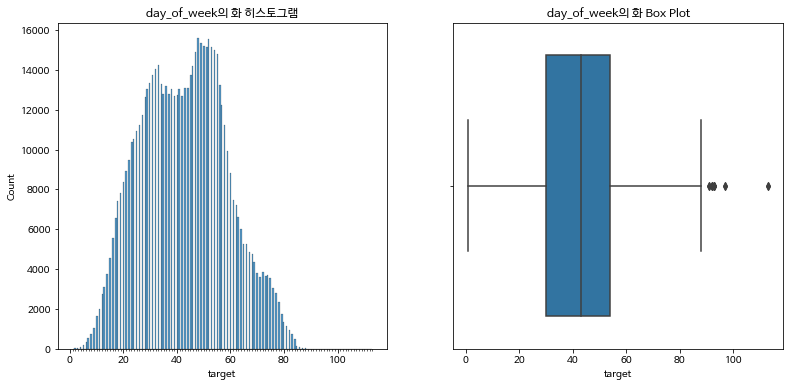

월 데이터 갯수 : 661643
target의 최대값 : 95.0
target의 최소값 : 1.0
target의 평균값 : 42.76136526797684
target의 중앙값 : 43.0
target의 최빈값 1순위 : 48.0 & 15644개
target의 최빈값 2순위 : 49.0 & 15435개
target의 최빈값 3순위 : 50.0 & 15371개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


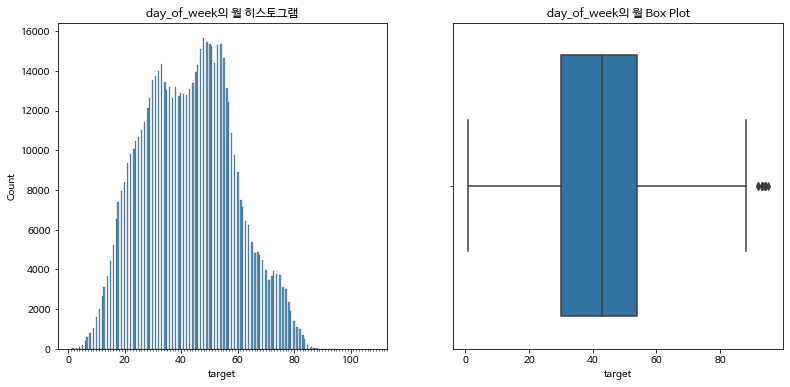

수 데이터 갯수 : 675583
target의 최대값 : 96.0
target의 최소값 : 1.0
target의 평균값 : 42.77037166417746
target의 중앙값 : 43.0
target의 최빈값 1순위 : 50.0 & 16005개
target의 최빈값 2순위 : 49.0 & 15848개
target의 최빈값 3순위 : 48.0 & 15806개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


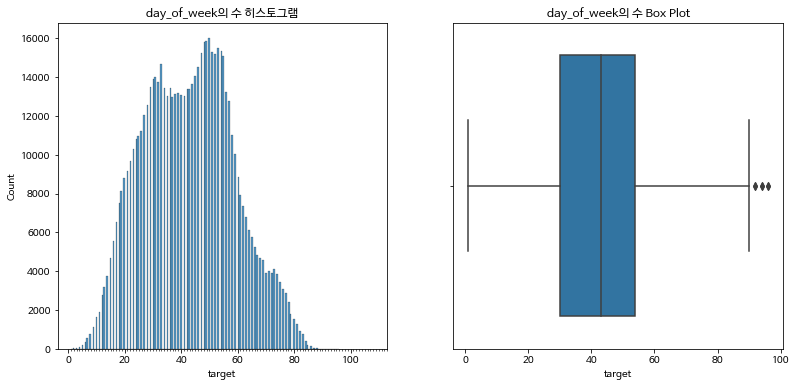

토 데이터 갯수 : 669767
target의 최대값 : 90.0
target의 최소값 : 1.0
target의 평균값 : 42.89411690931324
target의 중앙값 : 43.0
target의 최빈값 1순위 : 48.0 & 16229개
target의 최빈값 2순위 : 49.0 & 15755개
target의 최빈값 3순위 : 47.0 & 15361개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


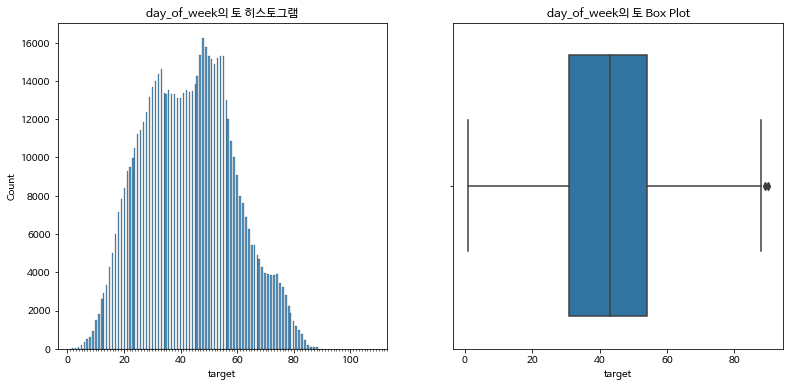

In [60]:
value_hist(df_train, 'day_of_week')

## 시간대 분포

15    214541
13    214297
14    214182
12    211833
19    209870
11    208515
16    208420
17    208377
18    207500
10    206316
9     205327
20    205059
21    203585
8     201875
22    200629
7     199061
6     189418
23    184229
1     182353
5     181128
2     169322
4     165284
3     155938
0     154158
Name: base_hour, dtype: int64


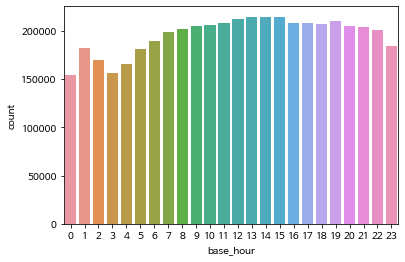

In [61]:
identify_count(df_train, 'base_hour')

## 차로 수 분포

2    2352092
1    1558531
3     790594
Name: lane_count, dtype: int64


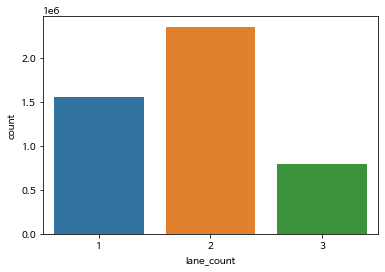

In [62]:
identify_count(df_train, 'lane_count')

1 데이터 갯수 : 1558531
target의 최대값 : 113.0
target의 최소값 : 1.0
target의 평균값 : 43.57056163785
target의 중앙값 : 45.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


target의 최빈값 1순위 : 54.0 & 52314개
target의 최빈값 2순위 : 48.0 & 52038개
target의 최빈값 3순위 : 49.0 & 50710개


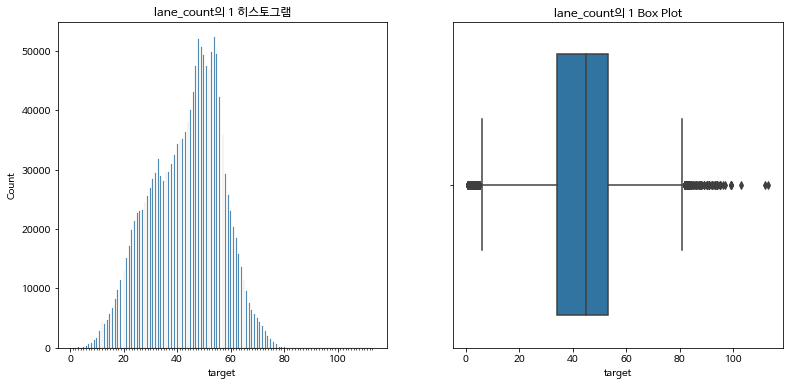

2 데이터 갯수 : 2352092
target의 최대값 : 113.0
target의 최소값 : 1.0
target의 평균값 : 44.9157129057877
target의 중앙값 : 45.0
target의 최빈값 1순위 : 55.0 & 47531개
target의 최빈값 2순위 : 33.0 & 47397개
target의 최빈값 3순위 : 54.0 & 46088개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


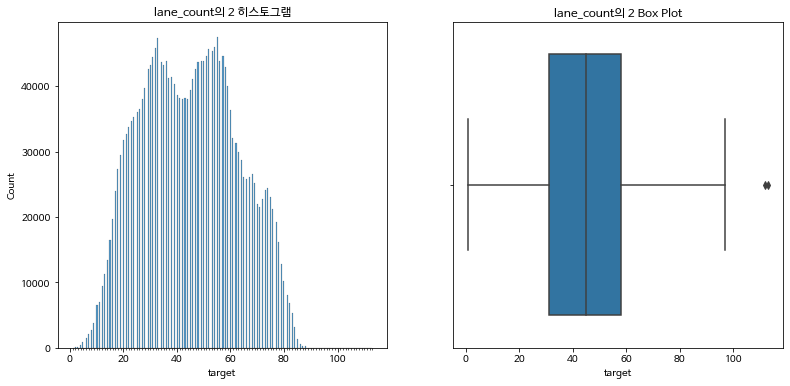

3 데이터 갯수 : 790594
target의 최대값 : 98.0
target의 최소값 : 2.0
target의 평균값 : 34.917783337591736
target의 중앙값 : 34.0
target의 최빈값 1순위 : 30.0 & 25464개
target의 최빈값 2순위 : 31.0 & 25086개
target의 최빈값 3순위 : 29.0 & 24500개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


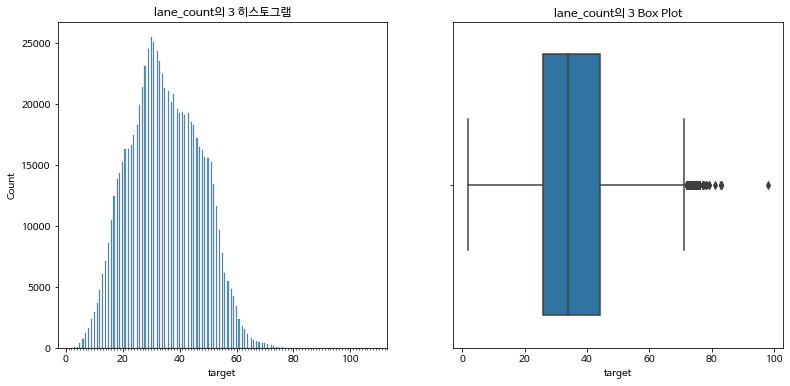

In [63]:
value_hist(df_train, 'lane_count')

## 도로 등급 분포

103    2159511
107    1582214
106     959492
Name: road_rating, dtype: int64


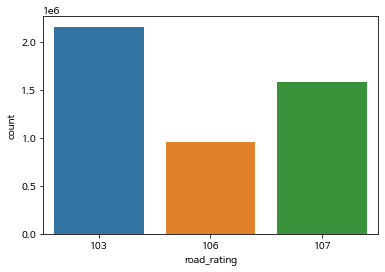

In [64]:
identify_count(df_train, 'road_rating')

106 데이터 갯수 : 959492
target의 최대값 : 99.0
target의 최소값 : 1.0
target의 평균값 : 48.02154786074298
target의 중앙값 : 50.0
target의 최빈값 1순위 : 54.0 & 43280개
target의 최빈값 2순위 : 53.0 & 41696개
target의 최빈값 3순위 : 55.0 & 39219개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


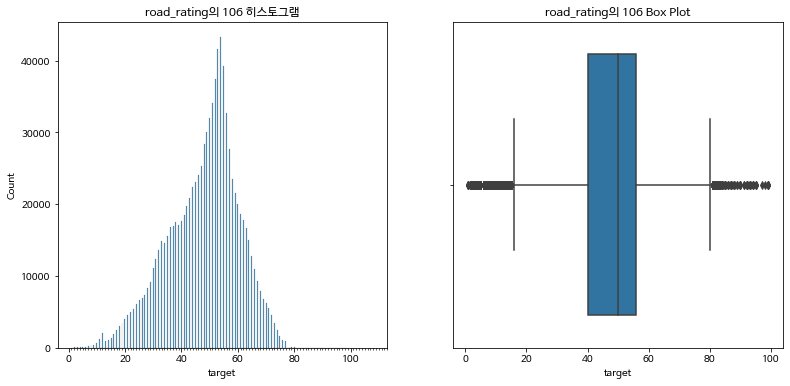

103 데이터 갯수 : 2159511
target의 최대값 : 113.0
target의 최소값 : 1.0
target의 평균값 : 46.388467574372164
target의 중앙값 : 47.0
target의 최빈값 1순위 : 48.0 & 67116개
target의 최빈값 2순위 : 49.0 & 65331개
target의 최빈값 3순위 : 47.0 & 63363개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


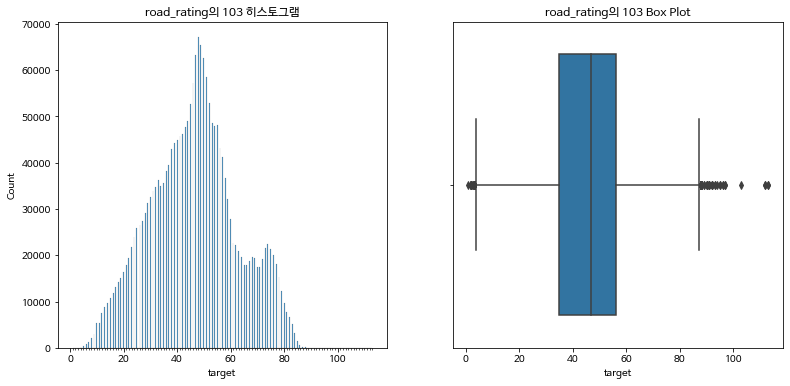

107 데이터 갯수 : 1582214
target의 최대값 : 94.0
target의 최소값 : 1.0
target의 평균값 : 34.70140764776446
target의 중앙값 : 32.0
target의 최빈값 1순위 : 29.0 & 52283개
target의 최빈값 2순위 : 30.0 & 51986개
target의 최빈값 3순위 : 31.0 & 51862개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


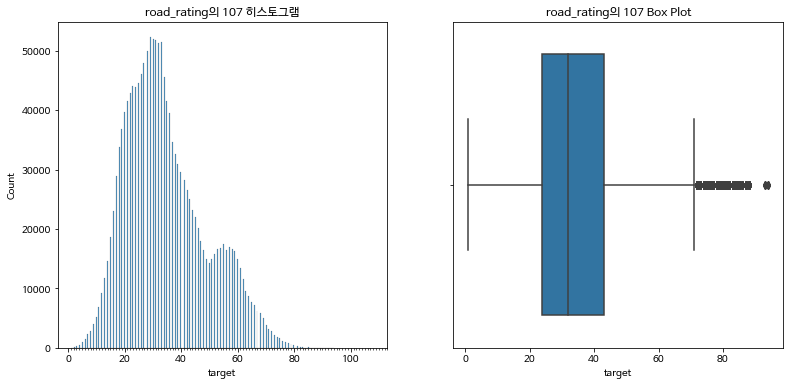

In [65]:
value_hist(df_train, 'road_rating')

## 중용 구간 여부 분포

0    4698978
1       2239
Name: multi_linked, dtype: int64


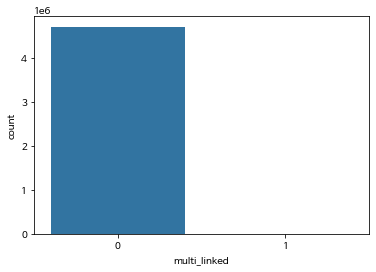

In [66]:
identify_count(df_train, 'multi_linked')

0 데이터 갯수 : 4698978
target의 최대값 : 113.0
target의 최소값 : 1.0
target의 평균값 : 42.791370166023334
target의 중앙값 : 43.0
target의 최빈값 1순위 : 48.0 & 111982개
target의 최빈값 2순위 : 49.0 & 110175개
target의 최빈값 3순위 : 50.0 & 108748개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


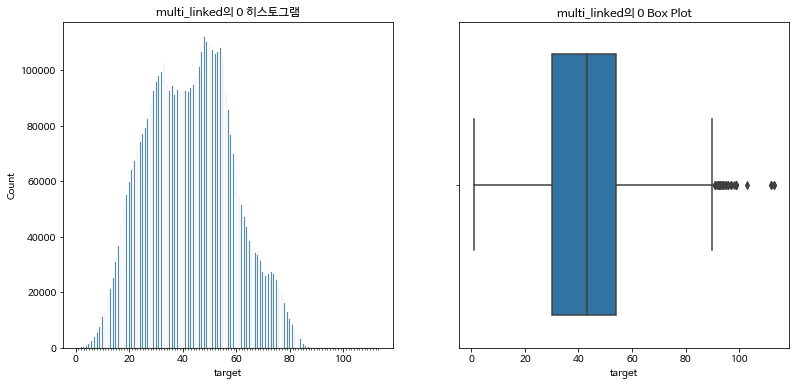

1 데이터 갯수 : 2239
target의 최대값 : 67.0
target의 최소값 : 5.0
target의 평균값 : 36.642697632871815
target의 중앙값 : 40.0
target의 최빈값 1순위 : 46.0 & 90개
target의 최빈값 2순위 : 43.0 & 75개
target의 최빈값 3순위 : 50.0 & 74개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


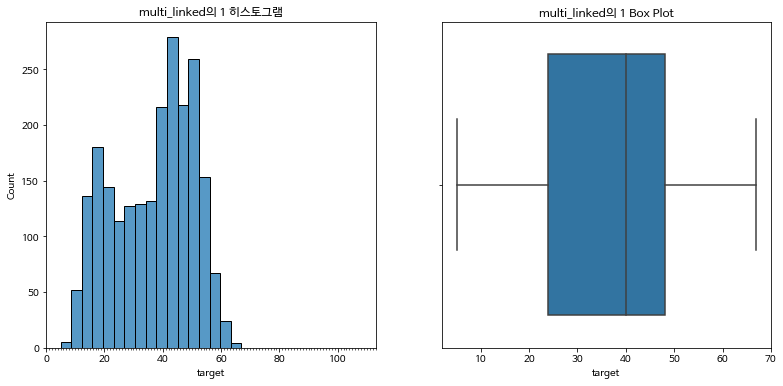

In [67]:
value_hist(df_train, 'multi_linked')

## 연결로 코드

0      4689075
103      12142
Name: connect_code, dtype: int64


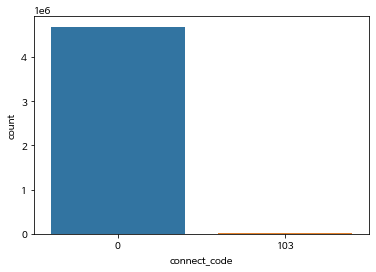

In [68]:
identify_count(df_train, 'connect_code')

0 데이터 갯수 : 4689075
target의 최대값 : 113.0
target의 최소값 : 1.0
target의 평균값 : 42.7491897655721
target의 중앙값 : 43.0
target의 최빈값 1순위 : 48.0 & 111618개
target의 최빈값 2순위 : 49.0 & 109785개
target의 최빈값 3순위 : 50.0 & 108295개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


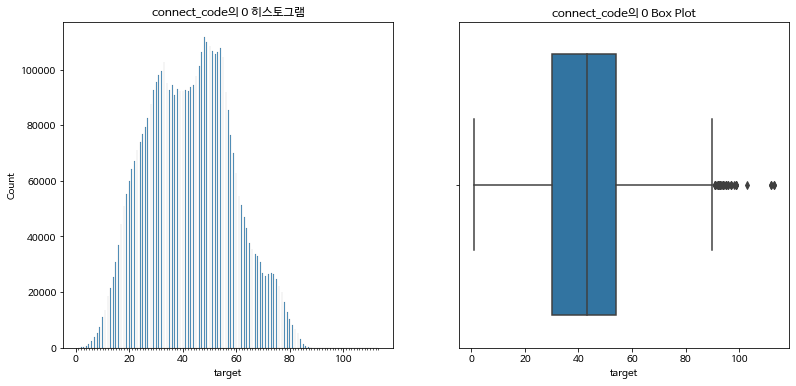

103 데이터 갯수 : 12142
target의 최대값 : 84.0
target의 최소값 : 15.0
target의 평균값 : 57.94704332070499
target의 중앙값 : 57.0
target의 최빈값 1순위 : 65.0 & 630개
target의 최빈값 2순위 : 66.0 & 612개
target의 최빈값 3순위 : 52.0 & 602개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


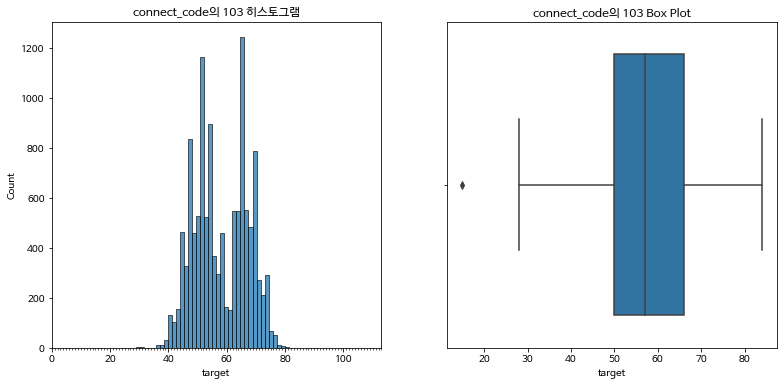

In [69]:
value_hist(df_train, 'connect_code')

## 최고 속도 제한 분포

60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: maximum_speed_limit, dtype: int64


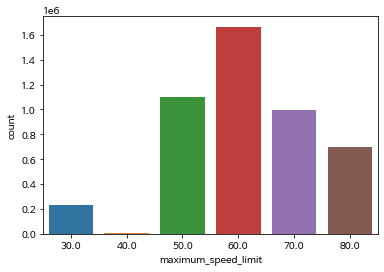

In [70]:
identify_count(df_train, 'maximum_speed_limit')

60.0 데이터 갯수 : 1665573
target의 최대값 : 103.0
target의 최소값 : 1.0
target의 평균값 : 42.316286947494945
target의 중앙값 : 44.0
target의 최빈값 1순위 : 48.0 & 54781개
target의 최빈값 2순위 : 54.0 & 54122개
target의 최빈값 3순위 : 49.0 & 53653개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


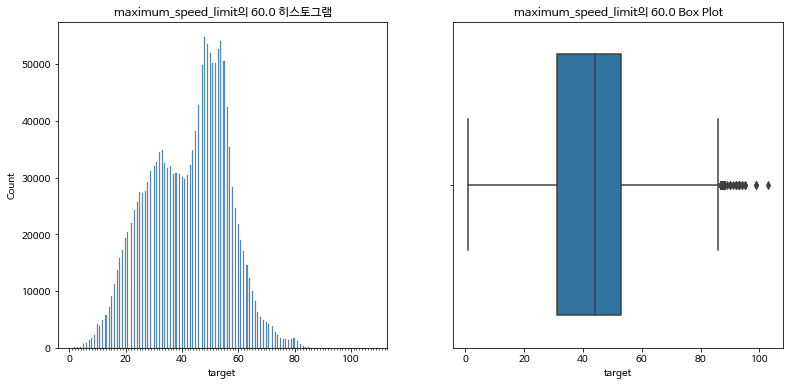

80.0 데이터 갯수 : 700334
target의 최대값 : 94.0
target의 최소값 : 3.0
target의 평균값 : 60.70369566521117
target의 중앙값 : 62.0
target의 최빈값 1순위 : 74.0 & 22814개
target의 최빈값 2순위 : 73.0 & 22087개
target의 최빈값 3순위 : 75.0 & 21621개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


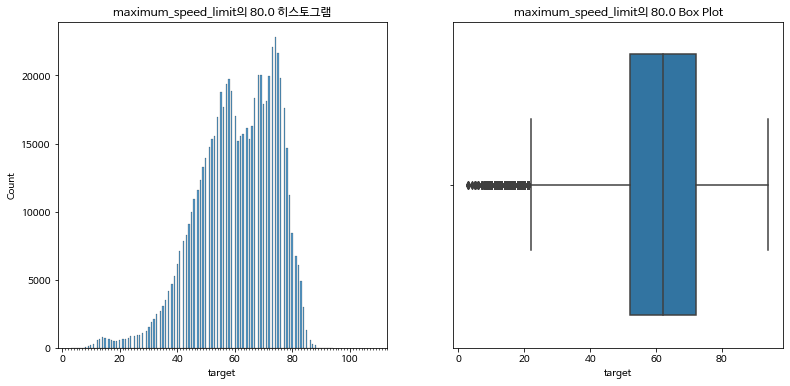

50.0 데이터 갯수 : 1103682
target의 최대값 : 113.0
target의 최소값 : 1.0
target의 평균값 : 35.49223055191622
target의 중앙값 : 34.0
target의 최빈값 1순위 : 33.0 & 37692개
target의 최빈값 2순위 : 32.0 & 36135개
target의 최빈값 3순위 : 31.0 & 35535개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


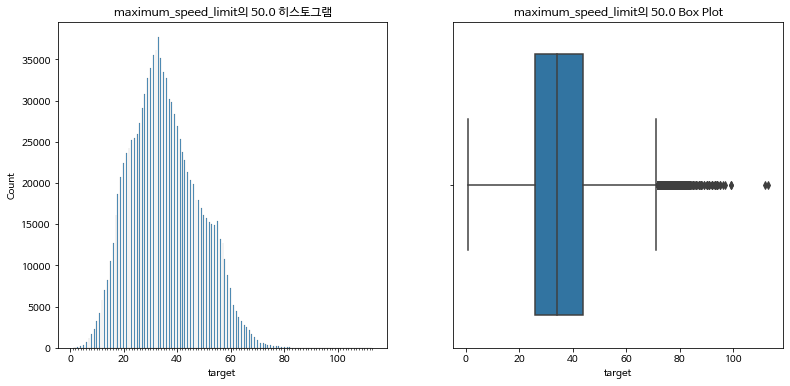

70.0 데이터 갯수 : 995077
target의 최대값 : 113.0
target의 최소값 : 2.0
target의 평균값 : 41.36620784120224
target의 중앙값 : 43.0
target의 최빈값 1순위 : 51.0 & 25525개
target의 최빈값 2순위 : 50.0 & 25348개
target의 최빈값 3순위 : 49.0 & 24426개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


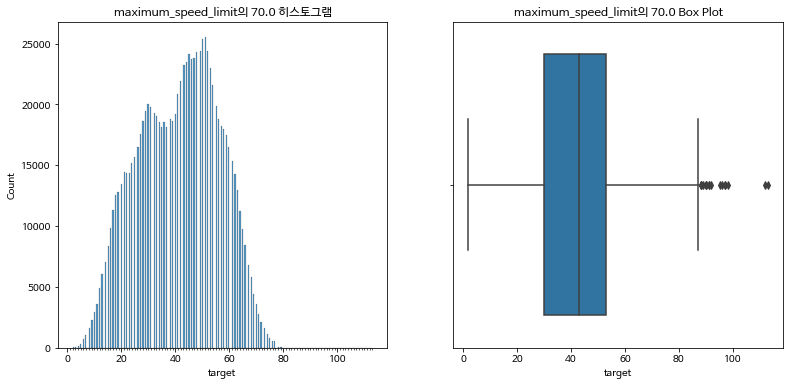

30.0 데이터 갯수 : 229761
target의 최대값 : 60.0
target의 최소값 : 1.0
target의 평균값 : 32.22082511827508
target의 중앙값 : 33.0
target의 최빈값 1순위 : 40.0 & 9811개
target의 최빈값 2순위 : 39.0 & 9479개
target의 최빈값 3순위 : 41.0 & 9423개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


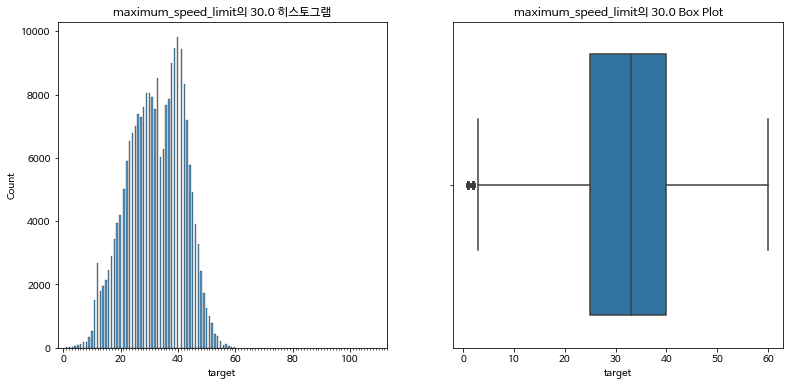

40.0 데이터 갯수 : 6790
target의 최대값 : 84.0
target의 최소값 : 15.0
target의 평균값 : 62.7740795287187
target의 중앙값 : 65.0
target의 최빈값 1순위 : 65.0 & 624개
target의 최빈값 2순위 : 66.0 & 611개
target의 최빈값 3순위 : 67.0 & 551개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


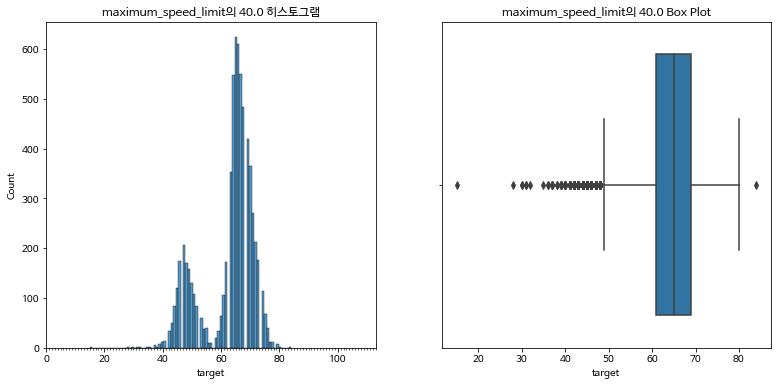

In [71]:
value_hist(df_train, 'maximum_speed_limit')

## 통과 제한 하중 분포

0.0        4032874
43200.0     410361
32400.0     239305
50000.0      18677
Name: weight_restricted, dtype: int64


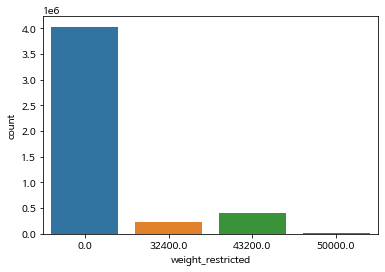

In [72]:
identify_count(df_train, 'weight_restricted')

32400.0 데이터 갯수 : 239305
target의 최대값 : 86.0
target의 최소값 : 3.0
target의 평균값 : 47.45335032698857
target의 중앙값 : 48.0
target의 최빈값 1순위 : 55.0 & 9833개
target의 최빈값 2순위 : 54.0 & 9488개
target의 최빈값 3순위 : 51.0 & 9102개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


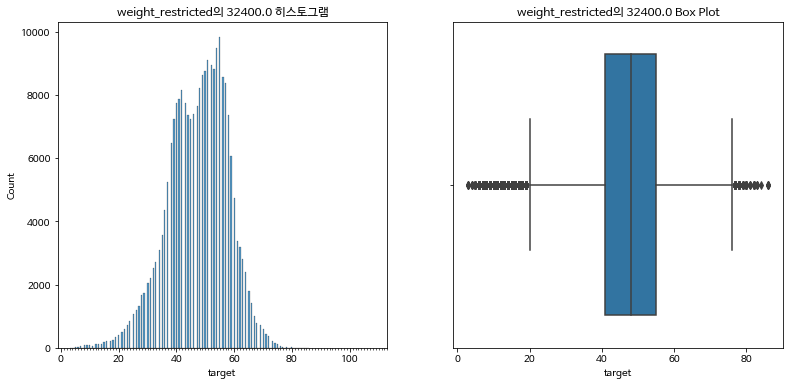

0.0 데이터 갯수 : 4032874
target의 최대값 : 113.0
target의 최소값 : 1.0
target의 평균값 : 40.95569586354545
target의 중앙값 : 40.0
target의 최빈값 1순위 : 33.0 & 98153개
target의 최빈값 2순위 : 32.0 & 95699개
target의 최빈값 3순위 : 31.0 & 94794개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


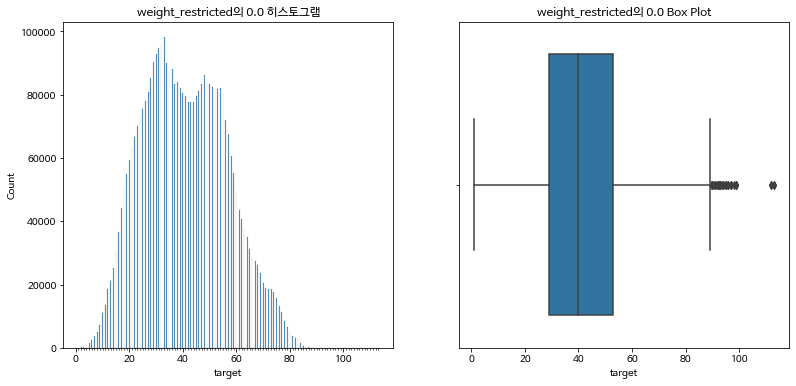

43200.0 데이터 갯수 : 410361
target의 최대값 : 103.0
target의 최소값 : 3.0
target의 평균값 : 57.883887601404616
target의 중앙값 : 55.0
target의 최빈값 1순위 : 54.0 & 16447개
target의 최빈값 2순위 : 53.0 & 15919개
target의 최빈값 3순위 : 48.0 & 14913개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


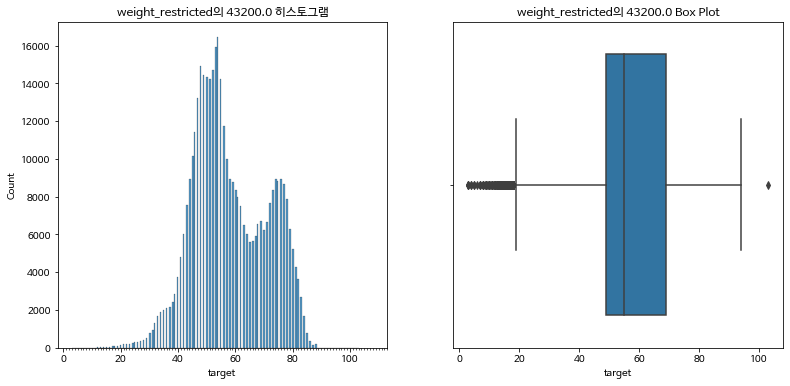

50000.0 데이터 갯수 : 18677
target의 최대값 : 67.0
target의 최소값 : 11.0
target의 평균값 : 47.08866520319109
target의 중앙값 : 48.0
target의 최빈값 1순위 : 48.0 & 2747개
target의 최빈값 2순위 : 49.0 & 2584개
target의 최빈값 3순위 : 50.0 & 2264개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


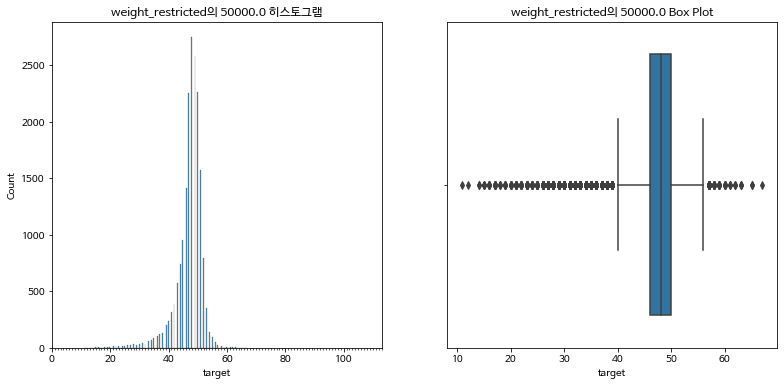

In [73]:
value_hist(df_train, 'weight_restricted')

## 통과 제한 높이 분포

0.0    4701217
Name: height_restricted, dtype: int64


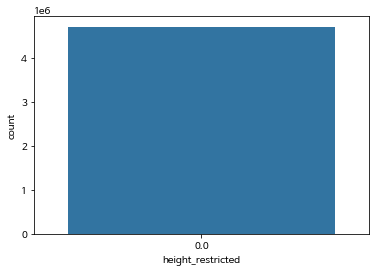

In [74]:
identify_count(df_train, 'height_restricted')

0.0 데이터 갯수 : 4701217
target의 최대값 : 113.0
target의 최소값 : 1.0
target의 평균값 : 42.78844180134633
target의 중앙값 : 43.0
target의 최빈값 1순위 : 48.0 & 112044개
target의 최빈값 2순위 : 49.0 & 110244개
target의 최빈값 3순위 : 50.0 & 108822개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


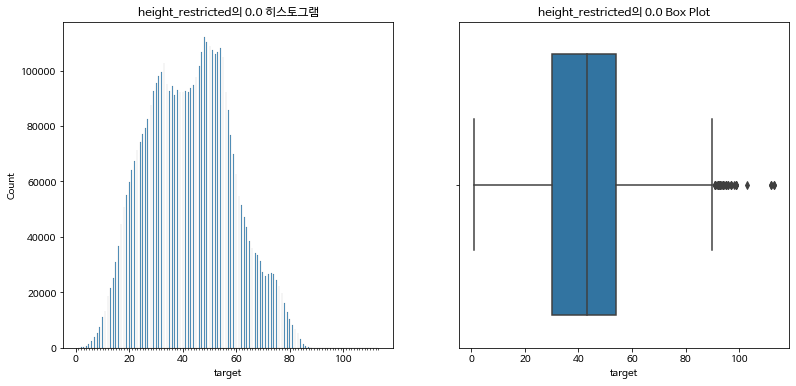

In [75]:
value_hist(df_train, 'height_restricted')

## 도로 유형 분포

0    3737117
3     964100
Name: road_type, dtype: int64


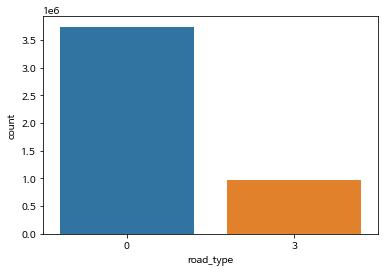

In [76]:
identify_count(df_train, 'road_type')

3 데이터 갯수 : 964100
target의 최대값 : 103.0
target의 최소값 : 3.0
target의 평균값 : 49.09712477958718
target의 중앙값 : 49.0
target의 최빈값 1순위 : 48.0 & 37266개
target의 최빈값 2순위 : 49.0 & 36250개
target의 최빈값 3순위 : 50.0 & 34894개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


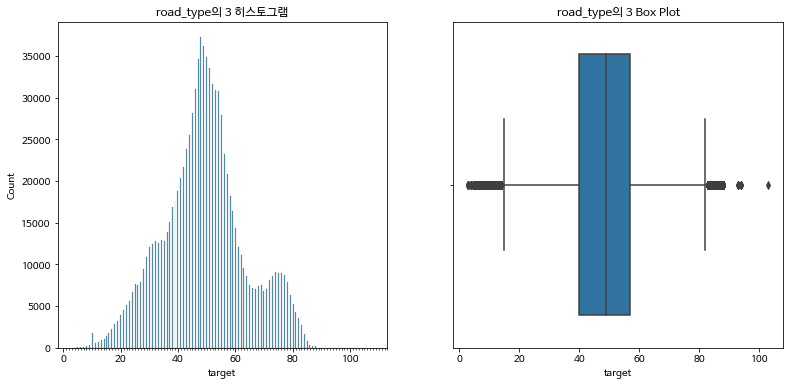

0 데이터 갯수 : 3737117
target의 최대값 : 113.0
target의 최소값 : 1.0
target의 평균값 : 41.16093020368375
target의 중앙값 : 40.0
target의 최빈값 1순위 : 33.0 & 90013개
target의 최빈값 2순위 : 32.0 & 86772개
target의 최빈값 3순위 : 31.0 & 85603개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


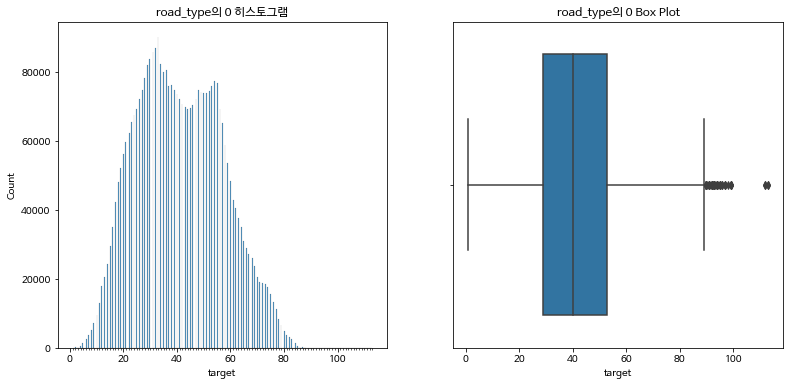

In [77]:
value_hist(df_train, 'road_type')

## 시작 지점의 회전제한 유무 분포

없음    4239701
있음     461516
Name: start_turn_restricted, dtype: int64


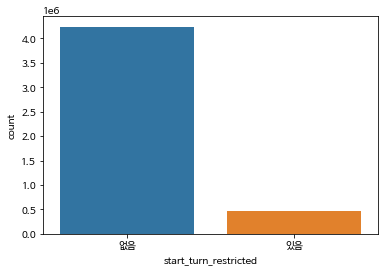

In [78]:
identify_count(df_train, 'start_turn_restricted')

없음 데이터 갯수 : 4239701
target의 최대값 : 113.0
target의 최소값 : 1.0
target의 평균값 : 43.610245864036166
target의 중앙값 : 44.0
target의 최빈값 1순위 : 48.0 & 105648개
target의 최빈값 2순위 : 49.0 & 104304개
target의 최빈값 3순위 : 50.0 & 103008개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


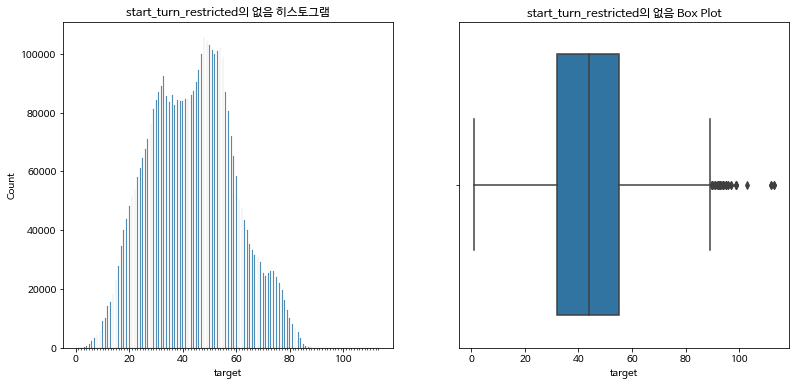

있음 데이터 갯수 : 461516
target의 최대값 : 98.0
target의 최소값 : 2.0
target의 평균값 : 35.23896679638409
target의 중앙값 : 33.0
target의 최빈값 1순위 : 22.0 & 13261개
target의 최빈값 2순위 : 23.0 & 13063개
target의 최빈값 3순위 : 24.0 & 12836개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


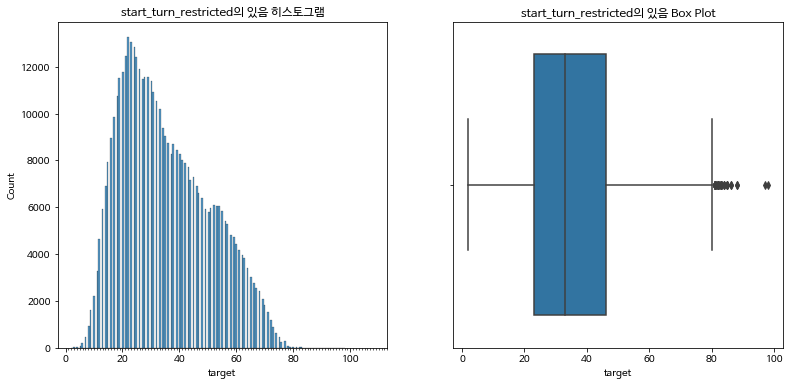

In [79]:
value_hist(df_train, 'start_turn_restricted')

## 도작지점의 회전제한 유무 분포

없음    4239599
있음     461618
Name: end_turn_restricted, dtype: int64


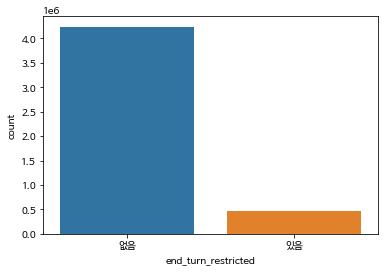

In [80]:
identify_count(df_train, 'end_turn_restricted')

없음 데이터 갯수 : 4239599
target의 최대값 : 113.0
target의 최소값 : 1.0
target의 평균값 : 43.64559030229038
target의 중앙값 : 44.0
target의 최빈값 1순위 : 48.0 & 105796개
target의 최빈값 2순위 : 49.0 & 104117개
target의 최빈값 3순위 : 50.0 & 102767개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


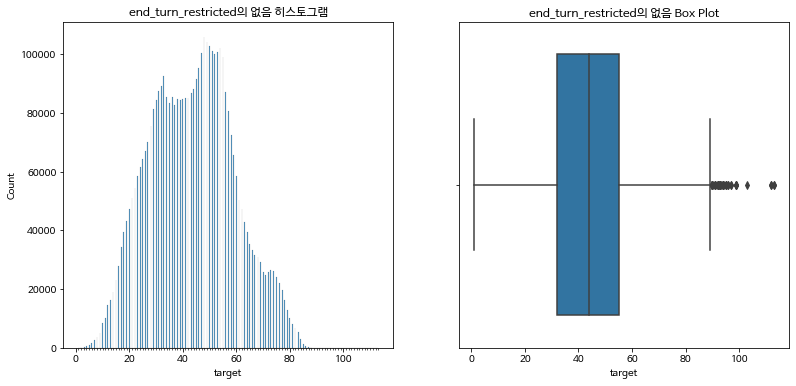

있음 데이터 갯수 : 461618
target의 최대값 : 98.0
target의 최소값 : 1.0
target의 평균값 : 34.916205607233685
target의 중앙값 : 32.0
target의 최빈값 1순위 : 21.0 & 13144개
target의 최빈값 2순위 : 22.0 & 12987개
target의 최빈값 3순위 : 23.0 & 12752개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


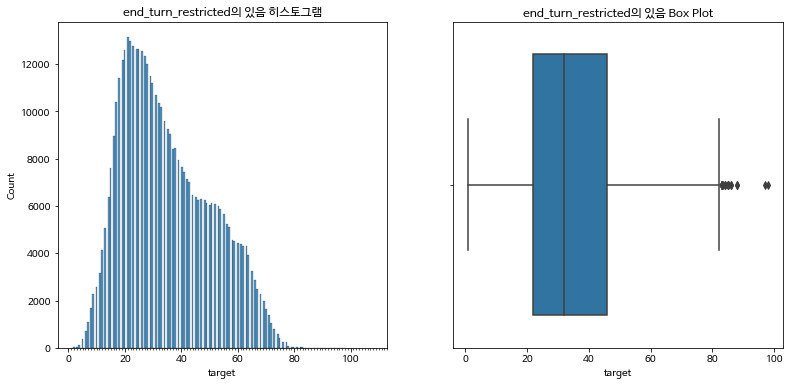

In [81]:
value_hist(df_train, 'end_turn_restricted')

## 통과 제한 차량 분포

0.0    4701217
Name: vehicle_restricted, dtype: int64


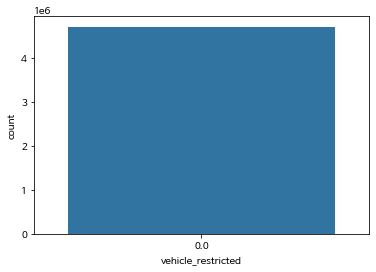

In [82]:
identify_count(df_train, 'vehicle_restricted')

0.0 데이터 갯수 : 4701217
target의 최대값 : 113.0
target의 최소값 : 1.0
target의 평균값 : 42.78844180134633
target의 중앙값 : 43.0
target의 최빈값 1순위 : 48.0 & 112044개
target의 최빈값 2순위 : 49.0 & 110244개
target의 최빈값 3순위 : 50.0 & 108822개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


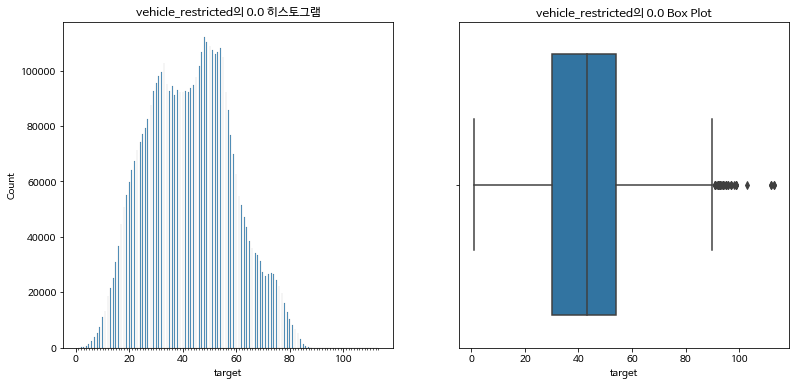

In [83]:
value_hist(df_train, 'vehicle_restricted')